#### 01. 주제를 설명하시오.

#### 미국 국립표준기술연구소(NIST)에서 제공한 손글씨 숫자 데이터셋을 수정하여 만들어진 MNIST 데이터셋으로  간단한 이미지 분류 문제를 해결하기 알고리즘과 딥러닝의 초기 학습 단계에서 모델을 구축하고 검증하는 데 효과적 입니다(합성곱적용)

# 합성곱 신경망의 시각화

In [4]:
# 필요한 라이브러리 및 모듈 임포트
from tensorflow import keras

In [6]:
(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()

In [7]:
(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()

In [8]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


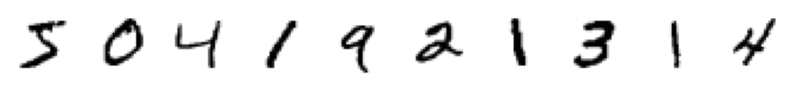

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))

for i in range(10):
    axs[i].imshow(train_input[i], cmap="gray_r")
    axs[i].axis("off")
plt.show()

In [5]:
print([train_target[i] for i in range(10)])

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [6]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


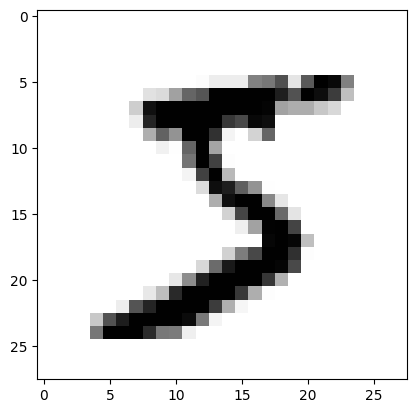

In [7]:
# 이미지 형태 출력을 위한 pyplot 모듈 import
import matplotlib.pyplot as plt
# 위 60000개 데이터 배열에서 0번째 원소를 흑백으로 출력
plt.imshow(train_input[0], cmap="gray_r")
plt.show()


In [8]:
################################

# 0번째 원소의 모든 데이터를 출력
for x in train_input[0]:
    for i in x:
        print("%4d" % i, end="")
    print('\n')

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0

   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0

   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0

   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0

# 로지스틱 회귀로 손글씨 분류 하기

In [9]:
train_scaled =  train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [10]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

In [11]:
sc =  SGDClassifier(loss="log_loss", max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(scores)

{'fit_time': array([6.15195656, 6.1050806 , 5.96445823, 6.04257798, 6.0269537 ]), 'score_time': array([0.04686522, 0.07811952, 0.04686952, 0.04688025, 0.04687667]), 'test_score': array([0.89725   , 0.885     , 0.88408333, 0.88425   , 0.909     ])}


In [12]:
print(np.mean(scores["test_score"]))

0.8919166666666666


# 인공신경망

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

## 인공 신경망으로 모델 만들기

In [14]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
        train_scaled, train_target, test_size = 0.2, random_state=42)

In [15]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [16]:
model = keras.Sequential()

In [17]:
# 신경망을 구성해줌
model.add(Flatten(input_shape=(28*28,)))
model.add(Dense(units=10, activation="softmax"))

In [18]:
# model이 어떻게 동작하는지 지정
model.compile(optimizer=SGD(learning_rate=0.001),
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'] )

In [19]:
# 설정이 다되었으면 모델 학습
history = model.fit(train_scaled, train_target, epochs=100, verbose=1, validation_data=(val_scaled, val_target))

Epoch 1/100


1500/1500 [==============================] - 3s 1ms/step - loss: 1.8625 - accuracy: 0.4597 - val_loss: 1.4205 - val_accuracy: 0.7066
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 1.2040 - accuracy: 0.7549 - val_loss: 1.0415 - val_accuracy: 0.7868
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9436 - accuracy: 0.8034 - val_loss: 0.8636 - val_accuracy: 0.8150
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8085 - accuracy: 0.8240 - val_loss: 0.7607 - val_accuracy: 0.8310
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7254 - accuracy: 0.8382 - val_loss: 0.6932 - val_accuracy: 0.8422
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6687 - accuracy: 0.8472 - val_loss: 0.6451 - val_accuracy: 0.8492
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6273 - accuracy: 0.8544 - val_loss: 0.6091 - val_

Epoch 54/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3628 - accuracy: 0.9010 - val_loss: 0.3606 - val_accuracy: 0.9012
Epoch 55/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3616 - accuracy: 0.9015 - val_loss: 0.3595 - val_accuracy: 0.9012
Epoch 56/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3605 - accuracy: 0.9017 - val_loss: 0.3583 - val_accuracy: 0.9013
Epoch 57/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3594 - accuracy: 0.9017 - val_loss: 0.3573 - val_accuracy: 0.9018
Epoch 58/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3583 - accuracy: 0.9021 - val_loss: 0.3563 - val_accuracy: 0.9020
Epoch 59/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3572 - accuracy: 0.9021 - val_loss: 0.3553 - val_accuracy: 0.9028
Epoch 60/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3562 - accuracy: 0.9022 - val_loss: 0.3543 -

In [20]:
test_scaled =  test_input / 255.0
test_scaled = test_scaled.reshape(-1, 28*28)
print(test_scaled.shape)

(10000, 784)


In [21]:
# Evaluation

print(model.evaluate(test_scaled, test_target))

#       loss                accuracy
# [0.2931129038333893, 0.9175999760627747]
#                      0.8919166666666666  머신러닝

# 우리 모델은 정확도가 91.7%인 모델이예요!
# 머신러닝의 Regression 중 Logistic Regression을 여러개 결합해서
# 구현한 Multinomial 구현이예요!

313/313 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.9139
[0.3149372935295105, 0.9139000177383423]


In [22]:
epochs = len(history.history['accuracy'])

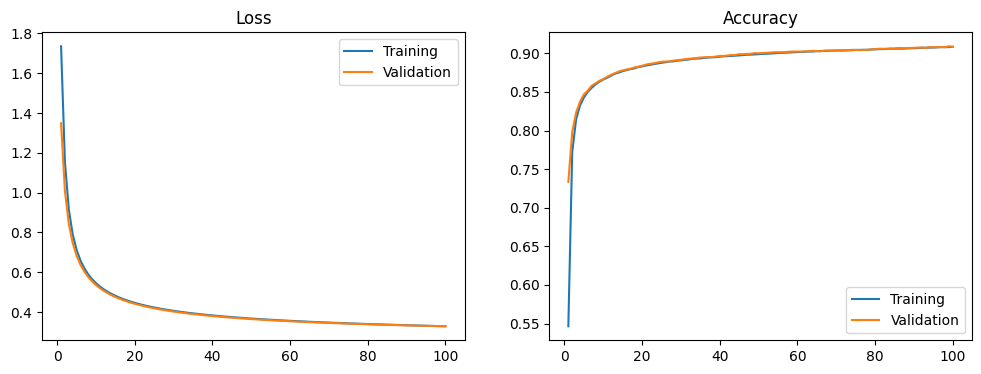

In [23]:
def plot_loss_acc(history, epochs):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epochs + 1), loss, label='Training')
    axes[0].plot(range(1, epochs + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epochs + 1), acc, label='Training')
    axes[1].plot(range(1, epochs + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()
    
plot_loss_acc(history, epochs)